### Lead Scoring Model

Problem: Lead Scoring Model

Selling something is not an easy task. A business might have many potential customers, commonly referred as leads, but not enough resources to cater them all. Even most of the leads won’t turn into actual bookings. So there is a need for a system that prioritises the leads, and sorts them on the basis of a score, referred to here as lead score. So whenever a new lead is generated, this system analyses the features of the lead and gives it a score that correlates with chances of it being converted into booking. Such ranking of potential customers not only helps in saving time but also helps in increasing the conversion rate by letting the sales team figure out what leads to spend time on.

Here you have a dataset of leads with their set of features and their status. You have to build a ML model that predicts the lead score as an OUTPUT on the basis of the INPUT set of features. This lead score will range from 0-100, so more the lead score means more chances of conversion of lead to WON.

NOTE: The leads with STATUS other than ‘WON’ or ‘LOST’ can be dropped during training.

NOTE: Treat all columns as CATEGORICAL columns

NOTE: 

This '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' represents NaN and could be present in more than one column.

Steps should be:

Data Cleaning ( including Feature Selection)
Training ( on Y percent of data)
Testing ( on (100-Y) percent of data)
Evaluate the performance using metrics such as accuracy, precision, recall and F1-score.

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset from local drive
data  = pd.read_csv(r"C:\PYTHON\PANDAS\data_science_internship_dump.csv")
df = data.loc[:,~data.columns.str.match("Unnamed")] # To remove Unnamed columms

In [3]:
df.head(4)

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31-08-2022,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...


In [4]:
# Getting the shape of the dataset
df.shape

(46608, 15)

###### Observation:
We have 46608 rows and 15 columns in given dataset

In [5]:
# Getting size of the dataset
df.size

699120

##### Observation:

We have 699120 cells data in given dataset

In [6]:
# Getting data types of the dataset
df.dtypes

Agent_id          object
status            object
lost_reason       object
budget            object
lease             object
movein            object
source            object
source_city       object
source_country    object
utm_source        object
utm_medium        object
des_city          object
des_country       object
room_type         object
lead_id           object
dtype: object

#### Observation :

Our dataset has all object type (categorical) of columns

In [7]:
# Getting Metada information of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Agent_id        46608 non-null  object
 1   status          46608 non-null  object
 2   lost_reason     43244 non-null  object
 3   budget          42908 non-null  object
 4   lease           44267 non-null  object
 5   movein          32970 non-null  object
 6   source          46608 non-null  object
 7   source_city     46608 non-null  object
 8   source_country  46608 non-null  object
 9   utm_source      46608 non-null  object
 10  utm_medium      46608 non-null  object
 11  des_city        46608 non-null  object
 12  des_country     46608 non-null  object
 13  room_type       23061 non-null  object
 14  lead_id         46608 non-null  object
dtypes: object(15)
memory usage: 5.3+ MB


##### Observation:

From the above information we can observe that Non-Null count, and dtype and its count of corresponding variables and also memory usage of variables.

In [8]:
# Getting Statistics of the given dataset
df.describe().T

,count,unique,top,freq
Agent_id,46608,120,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,8186
status,46608,6,LOST,43244
lost_reason,43244,30,Low availability,8892
budget,42908,1857,£60 - £120 Per week,9862
lease,44267,311,Full Year Course Stay 40 - 44 weeks,11111
movein,32970,477,10-09-2022,2453
source,46608,683,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,19306
source_city,46608,4336,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,8851
source_country,46608,186,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,18812
utm_source,46608,35,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,31125


##### Observation:

From the above information we can observe the count, Unique value, top, and frequency of corresponding variabe.

In [9]:
# Checking For Null values in given dataset
df.isnull().sum()

Agent_id              0
status                0
lost_reason        3364
budget             3700
lease              2341
movein            13638
source                0
source_city           0
source_country        0
utm_source            0
utm_medium            0
des_city              0
des_country           0
room_type         23547
lead_id               0
dtype: int64

##### Observation:
 The above information shows that some variables in the dataset has null values, they are : lost_reason, budget, lease, moviein, room_type.

##### Condition1:

Before filling the null values we have to do one thing according to given condition that: we have to keep the variable "STATUS" with only "WON" and "LOST" values while training. So, deleting unnessary rows or columns is best practice to build a successful model with high accuracy and also it saves the processing time and memory.

Now I am going to keep only nessary Rows and columns within dataset.

In [10]:
# Filter Rows by list of values
new_df = df.query('status == ["WON","LOST"]')

In [11]:
new_df.head()

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31-08-2022,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [12]:
new_df = new_df.astype(str)

In [13]:
# First, make categorical text lowercase
new_df = new_df.apply(lambda x: x.str.lower())

In [14]:
# create a dictionary to map values to 0 and 1
mapping = {'lost': 0, 'won': 1}

# use the map function to replace values in the 'result' column
new_df["status"] = new_df["status"].map(mapping)

In [15]:
# Let us check the status variable values
new_df["status"].unique()

array([0, 1], dtype=int64)

##### Observation:

Yes, we have only two categories in our data frame according to given condition 

###  Step1.Data Cleaning ( including Feature Selection)

When training machine learning models, it's often a good idea to eliminate special symbols from the data for the following reasons:

Special symbols like punctuation marks, dollar signs, and percent signs can increase the amount of noise in the data by adding more variance to the text.
By deleting these symbols, you can simplify the data and direct the model's attention to the key patterns.

The precision of the model can be affected by special symbols:
Certain symbols like quote marks and brackets, for example, can significantly change how the reader interprets a piece of writing.
If these symbols are not handled appropriately, the model may read them incorrectly, which would reduce its accuracy. 

Data processing problems can result from special symbols: Special symbols, especially those used as separators or delimiters, can result in data processing problems.
It can assist to check that the data is represented correctly for the model by removing these symbols. 

In [16]:
# remove special symbols from columns
new_df['budget'] = new_df['budget'].str.replace('[^A-Za-z0-9\s]+', '')
new_df['lease'] = new_df['lease'].str.replace('[^A-Za-z0-9\s]+', '')
new_df['lost_reason'] = new_df['lost_reason'].str.replace('[^A-Za-z0-9\s]+', '')

ID numbers are associated with sensitive or personal information (e.g., social security numbers or medical record numbers), then including them in the model could introduce bias or raise privacy concerns. In these cases, it might be better to remove the ID numbers or use anonymized versions instead. 

Here I am going to delete Agent_id, lead_id and movein columns to avoid bias.

In [17]:
# Deleting Unwanted columns
new_df = new_df.drop(["Agent_id","lead_id","movein"], axis = True)

In [18]:
# Removing Duplicate values
no_dup = new_df.drop_duplicates()

In [19]:
# Checking for shape of the dataset
no_dup.shape

(41374, 12)

##### Observation:

We can clearly observe that the count of rows before deleting duplicates (46317) and after deleting duplicates (43754). So, we have 2572 duplicate values in our dataset and are deleted.

In [20]:
# Checking for dtypes
no_dup.dtypes

status             int64
lost_reason       object
budget            object
lease             object
source            object
source_city       object
source_country    object
utm_source        object
utm_medium        object
des_city          object
des_country       object
room_type         object
dtype: object

In [21]:
# Checking for null values
no_dup.isnull().sum()

status            0
lost_reason       0
budget            0
lease             0
source            0
source_city       0
source_country    0
utm_source        0
utm_medium        0
des_city          0
des_country       0
room_type         0
dtype: int64

##### Observation:
Above information shows that some columns have null values. Now, i am going to fill null values with mode.

##### Condition2:
According to given condition all columns can be treated as categorical values. So, there is no need to convert budget to float type.

##### Condition3:

This'9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' represents NaN and could be present in more than one column.

According to this condition, now i am going to replace all NaN values with mode.

In [22]:
# Counting the NaN string count
count_nan = [len(no_dup[no_dup[x] == "9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0"]) for x in no_dup]
count_nan

[0, 0, 0, 0, 4771, 5675, 5499, 61, 2766, 1863, 1863, 0]

##### Observation:

Above output clearly shows that the count of the columns, containing NaN string values.

In [23]:
# Replacing NaN string with "np.NaN"
rep_nan = no_dup.replace(["9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0"], np.NaN)

In [24]:
# Checkin the count of replaced columns
cal_nan = [len(rep_nan[rep_nan[x] == "9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0"]) for x in rep_nan]
cal_nan

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [25]:
rep_nan.head(2)

,status,lost_reason,budget,lease,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type
0,0,not responding,nan,nan,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,nan
1,0,low budget,nan,nan,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,nan


In [26]:
rep_nan.isnull().sum()

status               0
lost_reason          0
budget               0
lease                0
source            4771
source_city       5675
source_country    5499
utm_source          61
utm_medium        2766
des_city          1863
des_country       1863
room_type            0
dtype: int64

##### Filling Null and Missing values with mode()

In [27]:
# Fill null values with mode of their corresponding column
rep_nan = rep_nan.fillna(rep_nan.mode().iloc[:,4:12])

In [28]:
rep_nan["lost_reason"] = rep_nan["lost_reason"].replace("nan", rep_nan["lost_reason"].mode()[0])
rep_nan["budget"] = rep_nan["budget"].replace("nan", rep_nan["budget"].mode()[0])
rep_nan["lease"] = rep_nan["lease"].replace("nan", rep_nan["lease"].mode()[0])
rep_nan["source"] = rep_nan["source"].replace(np.NaN, rep_nan["source"].mode()[0])
rep_nan["source_city"] = rep_nan["source_city"].replace(np.NaN, rep_nan["source_city"].mode()[0])
rep_nan["source_country"] = rep_nan["source_country"].replace(np.NaN, rep_nan["source_country"].mode()[0])
rep_nan["utm_source"] = rep_nan["utm_source"].replace(np.NaN, rep_nan["utm_source"].mode()[0])
rep_nan["utm_medium"] = rep_nan["utm_medium"].replace(np.NaN, rep_nan["utm_medium"].mode()[0])
rep_nan["des_city"] = rep_nan["des_city"].replace(np.NaN, rep_nan["des_city"].mode()[0])
rep_nan["des_country"] = rep_nan["des_country"].replace(np.NaN, rep_nan["des_country"].mode()[0])

In [29]:
rep_nan["room_type"].value_counts()

nan             19992
ensuite         11385
studio           6020
entire place     3974
non-ensuite         2
twin-studio         1
Name: room_type, dtype: int64

In [30]:
# Fill blank values with mode of their corresponding column
rep_nan = rep_nan.fillna(rep_nan.mode().iloc[:,3])
rep_nan["room_type"] = rep_nan["room_type"].str.replace("nan","ensuite")

In this case mode value is 'nan', so that is replaced with next majority value.

#### Data analysis

First we have to check target column whether it is Balanced or imbalenced. Because, When training with imbalanced data, machine learning classifiers may have difficulty accurately predicting the minority class because they have not been exposed to enough examples of that class. Instead, they may focus on predicting the majority class, which leads to a biased model that performs poorly on the minority class.

In [31]:
# Getting value counts on Target column ["status"]
rep_nan["status"].value_counts()

0    38444
1     2930
Name: status, dtype: int64

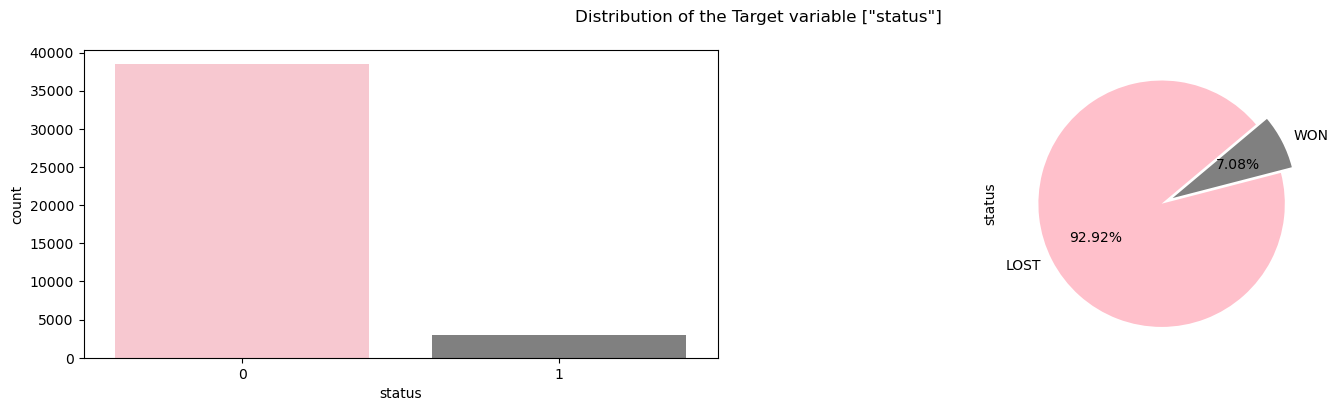

In [32]:
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.countplot(x=rep_nan["status"], palette=['pink','grey'])
plt.subplot(1,2,2)
rep_nan["status"].value_counts().plot(kind='pie', autopct='%.2f%%', explode=[0,0.1], startangle=40, colors=['pink','grey'],labels = ['LOST','WON'])
plt.suptitle('Distribution of the Target variable ["status"]')
plt.show()

### Observation:
From the above information it is clear that the data is prefect imbalanced and to overcome this we will use Synthetic Minority Oversampling Technique [SMOTE].

### Splitting Indipendent and Dependent variables

In [33]:
y = rep_nan["status"]
x = rep_nan.iloc[:,1:]

In [34]:
# Getting shape of the data
x.shape, y.shape

((41374, 11), (41374,))

### One-Hot encoding of data using get_dummies() method

The get_dummies() function takes a pandas dataframe or series as input and returns a new dataframe with one-hot encoded columns. The function automatically determines the categorical variables in the input data and applies one-hot encoding to them.

In [35]:
dummy_df = pd.get_dummies(x)

In [36]:
dummy_df.head()

,lost_reason_booked on campus accommodation,lost_reason_booked with competitor,lost_reason_booked with manager,lost_reason_cross sell,lost_reason_didnt respond in time,lost_reason_distance issue,lost_reason_guarantor issue,lost_reason_inadequate details,lost_reason_junk lead,lost_reason_junk lead just enquiring,...,des_country_8ef41e6f4b07432a0cb4eb7a8774e7a3878fd3e385f49aa09b406768467db228,des_country_abd149214539d9f222d25de6358735b9fa0efd3956f66102b2c119ae2d9f6348,des_country_be55ef3f4c4e6c2d9c2afe2a33ac90ad0f50d4de7f9163999877e2a9ca5a54f8,des_country_c1ef40ce0484c698eb4bd27fe56c1e7b68d74f9780ed674210d0e5013dae45e9,des_country_dd64913c8b91d76ca27b371f0b86fd30452370469b8cadf4e5a61d41d14e42ec,room_type_ensuite,room_type_entire place,room_type_non-ensuite,room_type_studio,room_type_twin-studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [37]:
dummy_df.shape

(41374, 7488)

##### Note:
While get_dummies() is a convenient way to perform one-hot encoding, it does have some limitations. One limitation is that it may not work well with high-cardinality categorical variables (i.e., categorical variables with many unique values), as it can lead to a large number of new columns in the resulting dataframe. Another limitation is that it does not support sparse matrix representations, which may be important for memory efficiency when working with large datasets. In such cases, OneHotEncoder may be a better option.

### Feature selection

The choice of the best feature selection test for a categorical dataset depends on several factors, such as the specific problem you are trying to solve, the number of features in the dataset, and the type of model you plan to use for classification.

Here are some common feature selection techniques for categorical datasets: 

>1. Chisquare Test     
>2. Mutual Information    
>3. Information gain     
>4. Recursive Feature Elimination

##### 1. Chi-squared test: 

The chi-squared test is a common feature selection method for categorical datasets. It measures the dependence between two categorical variables and can be used to identify features that are most strongly associated with the target variable.

Now we are using "SelectKBest class" function for extracting best features of given dataset. The SelectKBest method selects the features according to the k highest score. By changing the 'score_func' parameter we can apply the method for both classification and regression data. Selecting best features is important process when we prepare a large dataset for training. It helps us to eliminate less important part of the data and reduce a training time. 

In [38]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif

In [39]:
classifier1 = SelectKBest(score_func = chi2, k = 7488 ) # K = Number of features to select

In [40]:
fitting1 = classifier1.fit(dummy_df,rep_nan["status"])

In [41]:
x1 = pd.DataFrame(fitting1.scores_)

In [42]:
columns1 = pd.DataFrame(dummy_df.columns)

In [43]:
chi_scores = pd.concat([columns1,x1],axis=1)

In [44]:
chi_scores.columns = ['Attribute','Score']

In [45]:
chi_scores.sort_values(by='Score',ascending=False)

,Attribute,Score
15,lost_reason_low availability,6.884663e+03
7162,utm_source_44574c4ba2ea74ad4bf1e184133cdbf4e73...,1.263674e+03
21,lost_reason_not responding,5.277110e+02
1875,lease_51,4.638236e+02
20,lost_reason_not interested,4.400640e+02
...,...,...
5017,source_city_8b8bbd9fee6df61735e1b380be1f57d181...,7.946617e-05
7193,utm_medium_12fbf873f9dfa63a41270793b2d4ea4f218...,7.946617e-05
7074,source_country_9703d44c38351aa38679e254b5e6d19...,7.946617e-05
4587,source_city_70af65c90d5642c0a1ebcb20d01cd0e8f2...,6.785080e-05


##### Observation:

Above information shows that features and their corresponding score. By selecting the features according their corresponig score we will train the best model. Here i am not selecting any feature based on particular threshold value, instead i am proceeding with all features.

Not only above one, but also mutual_info_classif, information gain, Recursive Feature Elimination also can be used to select the best feature to train the model. Calculate all of the tests will take more processing time. So that, we will do them later.

### Train_Test_Split

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test = train_test_split(dummy_df,rep_nan["status"],random_state=42,test_size=0.30)

In [48]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((28961, 7488), (12413, 7488), (28961,), (12413,))

### Balancing the imbalanced dataset using SMOTE Technique

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
smote = SMOTE()

In [51]:
x_train,y_train = smote.fit_resample(x_train,y_train)
x_test,y_test = smote.fit_resample(x_test,y_test)

In [52]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(53820, 7488) (23068, 7488) (53820,) (23068,)


### MODEL BULDING

### 1.Logistic Regrssion

In [53]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(solver = 'lbfgs', random_state = 0)
model1.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [54]:
y_pred = model1.predict(x_test)

##### Calculating Confusion matrix and Other Scores

In [55]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)                     # Confusion Matrix
cm1.ravel()

array([11415,   119,   563, 10971], dtype=int64)

In [56]:
from sklearn.metrics import log_loss
logloss1 = log_loss(y_test, y_pred)                        # Log_loss Score

In [57]:
from sklearn.metrics import accuracy_score                 # Accuracy_Score
ac1 = accuracy_score(y_test, y_pred)

In [58]:
from sklearn import metrics                                # Precision_Score
precision_positive1 = metrics.precision_score(y_test, y_pred, pos_label = 1)
precision_negative1 = metrics.precision_score(y_test, y_pred, pos_label = 0)

In [59]:
recall_sensitivity1 = metrics.recall_score(y_test, y_pred, pos_label = 1)  # Recall_Score
recall_specificity1 = metrics.recall_score(y_test, y_pred, pos_label = 0)

In [60]:
f1_positive1 = metrics.f1_score(y_test, y_pred, pos_label = 1)            # f1_Score
f1_negative1 = metrics.f1_score(y_test, y_pred, pos_label = 0)

###### For ROC and AUC

In [61]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model1.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

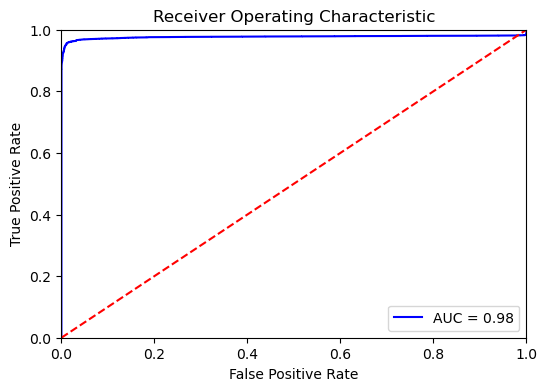

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [63]:
# auc Score
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, preds)

### 2.K-Neighbors Classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors = 11)
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

##### Calculating Confusion matrix and Other Scores

In [65]:
# Confusion Matrix
cm2 = confusion_matrix(y_test, y_pred)            
cm2.ravel()

array([11463,    71,  1060, 10474], dtype=int64)

In [66]:
# Log_loss Score
logloss2 = log_loss(y_test, y_pred)

In [67]:
# Accuracy_Score
ac2 = accuracy_score(y_test, y_pred)

In [68]:
# Precision_Score
precision_positive2 = metrics.precision_score(y_test, y_pred, pos_label = 1)
precision_negative2 = metrics.precision_score(y_test, y_pred, pos_label = 0)

In [69]:
# Recall_Score
recall_sensitivity2 = metrics.recall_score(y_test, y_pred, pos_label = 1)  
recall_specificity2 = metrics.recall_score(y_test, y_pred, pos_label = 0)

In [70]:
# f1_Score
f1_positive2 = metrics.f1_score(y_test, y_pred, pos_label = 1)            
f1_negative2 = metrics.f1_score(y_test, y_pred, pos_label = 0)

###### For ROC and AUC

In [71]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model2.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

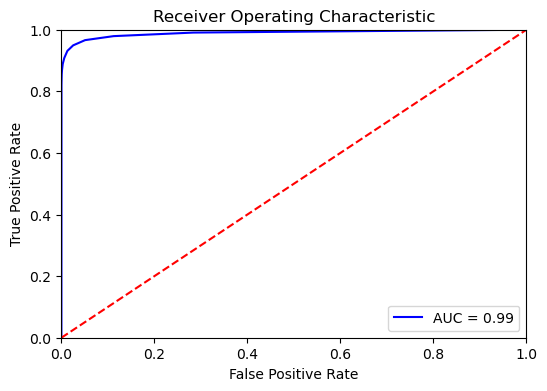

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [73]:
# auc Score
auc_score2 = roc_auc_score(y_test, preds)

### 3.Naive Bayes Classifier

In [74]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(x_train, y_train)

GaussianNB()

In [75]:
y_pred = model3.predict(x_test)

##### Calculating Confusion matrix and Other Scores

In [76]:
cm3 = confusion_matrix(y_test, y_pred)
cm3.ravel()

array([10362,  1172,  2390,  9144], dtype=int64)

In [77]:
  # Log_loss Score
logloss3 = log_loss(y_test, y_pred)                      

In [78]:
# Accuracy_Score
ac3 = accuracy_score(y_test, y_pred)

In [79]:
# Precision_Score
precision_positive3 = metrics.precision_score(y_test, y_pred, pos_label = 1)
precision_negative3 = metrics.precision_score(y_test, y_pred, pos_label = 0)

In [80]:
# Recall_Score
recall_sensitivity3 = metrics.recall_score(y_test, y_pred, pos_label = 1)  
recall_specificity3 = metrics.recall_score(y_test, y_pred, pos_label = 0)

In [81]:
# f1_Score
f1_positive3 = metrics.f1_score(y_test, y_pred, pos_label = 1)            
f1_negative3 = metrics.f1_score(y_test, y_pred, pos_label = 0)

###### For ROC and AUC

In [82]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model3.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

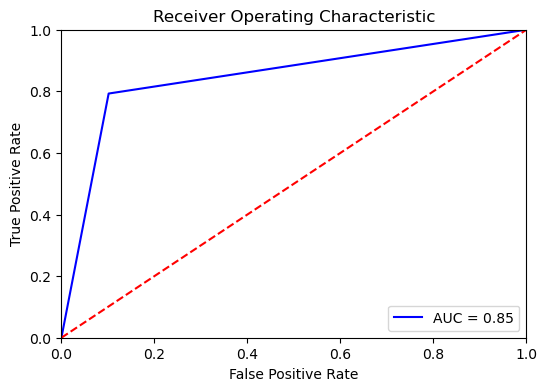

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [84]:
# auc Score
auc_score3 = roc_auc_score(y_test, preds)

### 4.Support Vector Classifier

In [85]:
from sklearn.svm import SVC
model4 = SVC(kernel = 'rbf', probability=True)

In [86]:
model4.fit(x_train, y_train)

SVC(probability=True)

In [87]:
y_pred = model4.predict(x_test)

##### Calculating Confusion matrix and Other Scores

In [88]:
cm4 = confusion_matrix(y_test, y_pred)
cm4.ravel()

array([11534,     0,  1417, 10117], dtype=int64)

In [89]:
# Log_loss Score
logloss4 = log_loss(y_test, y_pred)                      

In [90]:
# Accuracy Score
ac4 = accuracy_score(y_test, y_pred)

In [91]:
# Precision Score
precision_positive4 = metrics.precision_score(y_test, y_pred, pos_label = 1)
precision_negative4 = metrics.precision_score(y_test, y_pred, pos_label = 0)

In [92]:
# Recall_Score
recall_sensitivity4 = metrics.recall_score(y_test, y_pred, pos_label = 1)  
recall_specificity4 = metrics.recall_score(y_test, y_pred, pos_label = 0)

In [93]:
# f1_Score
f1_positive4 = metrics.f1_score(y_test, y_pred, pos_label = 1)            
f1_negative4 = metrics.f1_score(y_test, y_pred, pos_label = 0)

###### For ROC and AUC

In [94]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model4.predict_proba(x_test)

In [95]:
roc_auc = metrics.auc(fpr, tpr)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

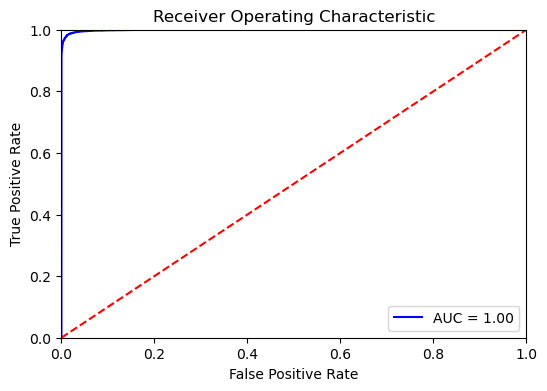

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [97]:
# auc Score
auc_score4 = roc_auc_score(y_test, preds)

### 5.Decision Tree Classifier

In [98]:
from sklearn.tree import DecisionTreeClassifier
model5 = DecisionTreeClassifier(criterion = 'entropy')
model5.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [99]:
y_pred = model5.predict(x_test)

##### Calculating Confusion matrix and Other Scores

In [100]:
# Confusion_Matrix
cm5 = confusion_matrix(y_test,y_pred)

In [101]:
# Log_loss Score
logloss5 = log_loss(y_test, y_pred)                        

In [102]:
# Accuracy Score
ac5 = accuracy_score(y_test, y_pred)

In [103]:
# Precision Score
precision_positive5 = metrics.precision_score(y_test, y_pred, pos_label = 1)
precision_negative5 = metrics.precision_score(y_test, y_pred, pos_label = 0)

In [104]:
# Recall_Score
recall_sensitivity5 = metrics.recall_score(y_test, y_pred, pos_label = 1) 
recall_specificity5 = metrics.recall_score(y_test, y_pred, pos_label = 0)

In [105]:
# f1_Score
f1_positive5 = metrics.f1_score(y_test, y_pred, pos_label = 1)            
f1_negative5 = metrics.f1_score(y_test, y_pred, pos_label = 0)

###### For ROC and AUC

In [106]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model5.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

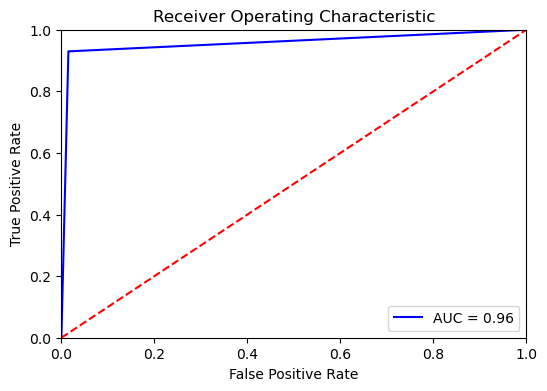

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [108]:
# auc Score
auc_score5 = roc_auc_score(y_test, preds)

### 6.Random forest Classifier

In [109]:
from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
model6.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [110]:
y_pred = model6.predict(x_test)

In [111]:
cm6 = confusion_matrix(y_test,y_pred)
cm6.ravel()

array([11434,   100,  1049, 10485], dtype=int64)

In [112]:
# Log_loss Score
logloss6 = log_loss(y_test, y_pred)                        

In [113]:
# Accuracy Score
ac6 = accuracy_score(y_test, y_pred)

In [114]:
# Precision Score
precision_positive6 = metrics.precision_score(y_test, y_pred, pos_label = 1)  
precision_negative6 = metrics.precision_score(y_test, y_pred, pos_label = 0)

In [115]:
# Recall_Score
recall_sensitivity6 = metrics.recall_score(y_test, y_pred, pos_label = 1)  
recall_specificity6 = metrics.recall_score(y_test, y_pred, pos_label = 0)

In [116]:
 # f1_Score
f1_positive6 = metrics.f1_score(y_test, y_pred, pos_label = 1)           
f1_negative6 = metrics.f1_score(y_test, y_pred, pos_label = 0)

###### For ROC and AUC

In [117]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model6.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

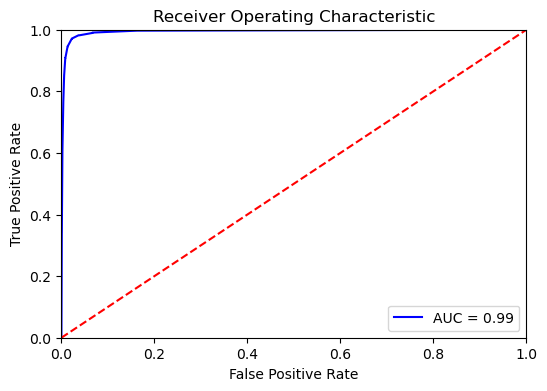

In [118]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [119]:
# auc Score
auc_score6 = roc_auc_score(y_test, preds)

### 7.XGBoost Classifier

In [120]:
from xgboost import XGBClassifier
model7 = XGBClassifier()

In [121]:
model7.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [122]:
y_pred = model7.predict(x_test)

In [123]:
# Confusin Matrix
cm7 = confusion_matrix(y_test,y_pred)

In [124]:
# Log_loss Score
logloss7 = log_loss(y_test, y_pred)                        

In [125]:
# Accuracy Score
ac7 = accuracy_score(y_test, y_pred)

In [126]:
# Precision Score
precision_positive7 = metrics.precision_score(y_test, y_pred, pos_label = 1)  
precision_negative7 = metrics.precision_score(y_test, y_pred, pos_label = 0)

In [127]:
# Recall_Score
recall_sensitivity7 = metrics.recall_score(y_test, y_pred, pos_label = 1)  
recall_specificity7 = metrics.recall_score(y_test, y_pred, pos_label = 0)

In [128]:
 # f1_Score
f1_positive7 = metrics.f1_score(y_test, y_pred, pos_label = 1)           
f1_negative7 = metrics.f1_score(y_test, y_pred, pos_label = 0)

###### For ROC and AUC

In [129]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model7.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

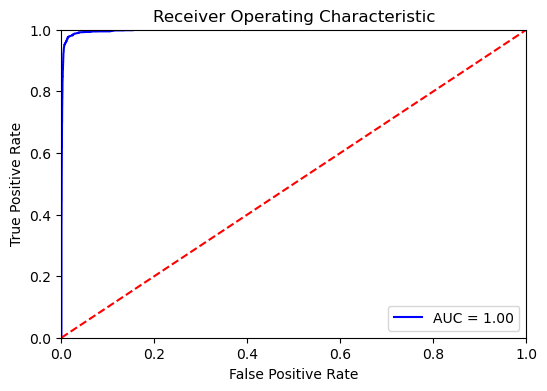

In [130]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [131]:
# auc Score
auc_score7 = roc_auc_score(y_test, preds)

### Cross Validation of All models

#### Stratified-k-fold Cross-Validation approach
Stratified k-fold cross-validation is a widely used technique in machine learning to evaluate the performance of a model. It is an extension of the k-fold cross-validation method and is particularly useful when dealing with imbalanced datasets, where the distribution of target variables is uneven.

#### CV_for_Logistic Regression

In [132]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [133]:
skfold = StratifiedKFold(n_splits=5)

In [134]:
model1 = LogisticRegression(solver = 'lbfgs', random_state = 0)

In [135]:
scores1 = cross_val_score(model1,dummy_df,rep_nan["status"],cv=skfold)

#### CV_for_KNN_Classifier

In [136]:
model2 = KNeighborsClassifier(n_neighbors = 11)

In [137]:
scores2 = cross_val_score(model2,dummy_df,rep_nan["status"],cv=skfold)

#### CV_for_Naive_Bayes_Classifier

In [138]:
model3 = GaussianNB()

In [139]:
scores3 = cross_val_score(model3,dummy_df,rep_nan["status"],cv=skfold)

#### CV_for_SVM_Classifier

In [140]:
model4 = SVC(kernel = 'rbf')

In [141]:
scores4 = cross_val_score(model5,dummy_df,rep_nan["status"],cv=skfold)

#### CV_for_Decision_Tree_Classifier

In [142]:
model5 = DecisionTreeClassifier(criterion = 'entropy')

In [143]:
scores5 = cross_val_score(model5,dummy_df,rep_nan["status"],cv=skfold)

#### CV_for_Random_Forest_Classifier

In [144]:
model6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')

In [145]:
scores6 = cross_val_score(model6,dummy_df,rep_nan["status"],cv=skfold)

#### CV_for_XGB_Classifier

In [146]:
model7 = XGBClassifier()

In [147]:
scores7 = cross_val_score(model7,dummy_df,rep_nan["status"],cv=skfold)

## Display of Model's Scores

In [148]:
data = {"Accuracy_Score":[ac1,ac2,ac3,ac4,ac5,ac6,ac7],
        "log_loss_Score":[logloss1,logloss2,logloss3,logloss4,logloss5,logloss6,logloss7],
        "F1_Score_Positive":[f1_positive1,f1_positive2,f1_positive3,f1_positive4,f1_positive5,f1_positive6,f1_positive7],
        "F1_Score_Nagative":[f1_negative1,f1_negative2,f1_negative3,f1_negative4,f1_negative5,f1_negative6,f1_negative7],
        "Precision_Positive":[precision_positive1,precision_positive2,precision_positive3,precision_positive4,precision_positive5,precision_positive6,precision_positive7],
        "Precision_Nagative":[precision_negative1,precision_negative2,precision_negative3,precision_negative4,precision_negative5,precision_negative6,precision_negative7],
        "Recall_sensitivity":[recall_sensitivity1,recall_sensitivity2,recall_sensitivity3,recall_sensitivity4,recall_sensitivity5,recall_sensitivity6,recall_sensitivity7],
        "Recall_specificity":[recall_specificity1,recall_specificity2,recall_specificity3,recall_specificity4,recall_specificity5,recall_specificity6,recall_specificity7],
        "AUC_Score":[auc_score1,auc_score2,auc_score3,auc_score4,auc_score5,auc_score6,auc_score7]}
All_scores = pd.DataFrame(data, index = ["LR","KNN","NB","SVM","DT","RF","XGB"])

In [149]:
All_scores

,Accuracy_Score,log_loss_Score,F1_Score_Positive,F1_Score_Nagative,Precision_Positive,Precision_Nagative,Recall_sensitivity,Recall_specificity,AUC_Score
LR,0.970435,1.065622,0.969855,0.970994,0.989270,0.952997,0.951188,0.989683,0.976832
KNN,0.950971,1.767183,0.948775,0.952987,0.993267,0.915356,0.908098,0.993844,0.989267
NB,0.845587,5.565610,0.836979,0.853331,0.886390,0.812578,0.792787,0.898387,0.845587
SVM,0.938573,2.214057,0.934553,0.942128,1.000000,0.890588,0.877146,1.000000,0.998889
DT,0.957213,1.542183,0.955991,0.958370,0.984118,0.933142,0.929426,0.985001,0.957378
RF,0.950191,1.795308,0.948054,0.952159,0.990553,0.915966,0.909051,0.991330,0.993956
XGB,0.979756,0.729686,0.979910,0.979599,0.972504,0.987233,0.987428,0.972083,0.997515


## Display of Cross Validation Scores

In [150]:
data1 = {"Mean_CV_Scores":[np.mean(scores1),np.mean(scores2),np.mean(scores3),np.mean(scores4),np.mean(scores5),np.mean(scores6),np.mean(scores7)]}
Cross_Val_scores = pd.DataFrame(data1, index = ["LR","KNN","NB","SVM","DT","RF","XGB"])

In [151]:
Cross_Val_scores

,Mean_CV_Scores
LR,0.982066
KNN,0.954246
NB,0.883235
SVM,0.975419
DT,0.975347
RF,0.961957
XGB,0.981848


### Conclusion:

1.	The leads with STATUS other than ‘WON’ or ‘LOST’ dropped during training.

2.	All categorical column treated as categorical column except “Status”, this is because XGBoost model doesn’t accept categorical targe. So that, status has converted into binary format.Here 0 represents Lost and 1 represents won.

3.	The values in the data frame are converted to lower case. It has following benefits:

    a.	Consistency: Converting all letters to lowercase ensures that all text is consistent, which can help prevent errors and improve the accuracy of the analysis.
    
    b.	Normalization: Converting all letters to lowercase can help normalize the text and remove any variations in capitalization that may be present. This can help ensure that the analysis is based on the content of the text, rather than superficial features like capitalization.
    
    c.	Reduction of vocabulary size: By converting all letters to lowercase, the number of unique words in the text can be reduced. This can help simplify the analysis and make it more efficient.
    
    d.	Improved generalization: Converting all letters to lowercase can help the model generalize better to new data. Since the model will not be biased towards certain capitalizations, it will be better able to recognize patterns and make accurate predictions on new data.
    
4.	All Special Characters are removed from the dataset.  Removing Special characters will help in: 
    
    a.	Noise reduction: Special characters can add noise to the text data and make it more difficult for the model to accurately classify or analyze the text.
    
    b.	Consistency: Removing special characters can ensure that the text data is consistent, which can help prevent errors and improve the accuracy of the analysis.
    
    c.	Normalization: Removing special characters can help normalize the text and remove any variations that may be present. This can help ensure that the analysis is based on the content of the text, rather than superficial features like special characters.
    
    d.	Reduction of vocabulary size: By removing special characters, the number of unique words in the text can be reduced. This can help simplify the analysis and make it more efficient.
    e.	Improved generalization: Removing special characters can help the model generalize better to new data. Since the model will not be biased towards certain special characters, it will be better able to recognize patterns and make accurate predictions on new data.
    
5.	Given string '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' is considered as NaN and it is replaced with mode of appropriate column wherein it is present.

6.	All missing values are filled and replaced with mode and appropriate values.

7.	Imbalanced data Identified for the target column and it is balanced using Synthetic Minority Oversampling Technique. It is a data augmentation technique that is commonly used to address the issue of imbalanced datasets.

8.	In imbalanced datasets, the number of samples in the majority class (the class with the most samples) is much higher than the number of samples in the minority class (the class with the fewest samples). This can lead to biased models that are overly sensitive to the majority class and perform poorly on the minority class. SMOTE addresses this issue by generating synthetic examples of the minority class. It does this by identifying minority class samples that are similar to one another and then creating new synthetic samples in between them. These synthetic samples are then added to the dataset to balance the number of samples between the majority and minority classes. By using SMOTE, the imbalanced dataset can be transformed into a balanced dataset, which can help improve the accuracy of the machine learning model.

9.	To convert the values into useful vectors pandas pd.get_dummies( ) method has been used. The get_dummies() function takes a pandas dataframe or series as input and returns a new dataframe with one-hot encoded columns. The function automatically determines the categorical variables in the input data and applies one-hot encoding to them. 

    Note : While get_dummies() is a convenient way to perform one-hot encoding, it does have some limitations. One limitation is that it may not work well with high-cardinality categorical variables (i.e., categorical variables with many unique values), as it can lead to a large number of new columns in the resulting dataframe. Another limitation is that it does not support sparse matrix representations, which may be important for memory efficiency when working with large datasets. In such cases, OneHotEncoder may be a better option.

10.	For feature selection 4 methos has been chosen but, not used, because they takes more time.

11.	Train test split has been performed with train test ratio 70:30.

12.	Trained the train data set and predicted the test data set with seven types of classifiers.

13.	Calculated evaluation metrics like Accuracy, F1, Precision, Recall AUC, ROC , Cross validation scores for all models separately.

14.	Cross validation also has been done on the all models separately.

15.	Amon all the Classifiers XG_Boost classifier gave best results with F1_Score 0.97, Accuracy 0.97, Cross validation Score 0.98.

16.	All the Score Reports has Framed at the end.